# Exploratory Data Analysis: Online Retail Dataset  
*Author: Pragun Sapotra*  
*Date: August 2025*

This notebook explores the "Online Retail" dataset to understand data structure, types, and basic statistics.  
It sets the foundation for subsequent data cleaning and analysis tasks.


## Importing libraries

In [70]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Define file path to Excel dataset

In [71]:
base_dir = os.getcwd()
file_path = os.path.join(base_dir, "../Data/global_indicators_raw.xlsx")

### Retrieving Sheet Names from the Excel File

In [72]:
xlsx = pd.ExcelFile(file_path)
print(xlsx.sheet_names)


['Online Retail']


### Load Data from 'Online Retail' Sheet  
Read the 'Online Retail' sheet into a DataFrame for analysis.


In [73]:
raw_df = pd.read_excel(file_path, sheet_name='Online Retail')
df = raw_df.copy()

KeyboardInterrupt: 

## Initial Data Exploration

### Check Dataset Shape (Rows & Columns)

In [ ]:
df.shape

(541909, 8)

### View First and Last Few Rows (head(), tail())

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


### View Column Names and Data Types

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


### Initial Observations:
- The Description and CustomerID columns have some missing values, which might need cleaning.
- CustomerID is stored as a float, which seems unusual because IDs are usually strings or integers. I think this might be because of those missing values (NaNs) causing pandas to use float by default.
- InvoiceNo has many repeated values, which could mean multiple items per invoice or duplicate records — I need to check that further.


## Handling Duplicates
In this section, I check for duplicate rows, inspect them, and filter specific cases for further investigation.


### Identify Duplicate Rows

In [ ]:
df.duplicated().sum()

np.int64(5268)

The dataset contains 5268 fully duplicated rows.


In [ ]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


Viewing the duplicate rows reveals that they have identical values across all columns.

### Filter Specific Duplicate Cases for Investigation
Example: Filtering duplicates with StockCode = 22111 and InvoiceNo = 536409.


In [ ]:
df[ (df["StockCode"] == 22111) & (df["InvoiceNo"] == 536409	) ]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom


### Removing Duplicate Rows


In [ ]:
df.drop_duplicates(inplace=True)

**Removed all exact duplicate rows** across the entire dataset using `drop_duplicates()` to ensure each record is unique.  
Kept the **first occurrence** of each unique row and dropped the rest.  

- **Total rows before:** 541,909  
- **Total rows after:** 536,641  


## Missing Values Analysis & Cleaning

### Count Missing Values per Column
Checking for null values in each column to identify data gaps before cleaning.


In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

### Missing Values Overview
- `Description`: 1,454 missing entries.
- `CustomerID`: 135,037 missing entries — likely guest or anonymous customers.
- All other columns have no missing values.

### Inspect `Description` Column

In [ ]:
df[df['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


**Observations on Missing `Description` Values:**  
- All rows retrieved with `Above command` have a **`UnitPrice` of 0.0**.  
- All of them also have a **missing (`NaN`) `CustomerID`**.  
- At least one row has a **negative `Quantity`**, which could indicate a return.  
- This suggests these records might represent **invalid or placeholder transactions**, but this needs full validation before deciding how to handle them.  


In [ ]:
df[(df["Description"].isnull()) & (df["UnitPrice"]== 0.0) & (df["CustomerID"].isnull())]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


**Observations on Missing `Description` Values:**  
- All 1454 rows with missing `Description` also have:  
  - **`UnitPrice` of 0.0**  
  - **Missing (`NaN`) `CustomerID`**  
  - The same **`StockCode` = 22139**  
- These rows appear to be non-usable for analysis and may need to be removed.  

In [ ]:
df.loc[df["StockCode"] == 22139, "Description"].dropna().unique()


array(['RETROSPOT TEA SET CERAMIC 11 PC ', 'amazon'], dtype=object)

**Investigation of Missing `Description` Values:**
- Checked if missing `Description` rows could be filled using their `StockCode`.
- Found that `StockCode 22139` (which appears in all such rows) maps to **multiple different descriptions** in the dataset.
- Since there is no reliable 1-to-1 mapping, filling these values could introduce incorrect data.
- Decision: **Drop these rows** instead of imputing a value.


### Handle Missing Values

In [ ]:
df.drop(df [(   df["Description"].isnull())
             & (df["UnitPrice"]== 0.0) 
             & (df["CustomerID"].isnull())
            ].index,
        inplace=True)

**Removed Invalid Placeholder Transactions**  
Dropped rows where:  
- `Description` is missing (`NaN`)  
- `UnitPrice` equals `0.0`  
- `CustomerID` is missing (`NaN`)  

These records appear to be non-usable placeholder entries.  

- **Total rows before:** 536,641  
- **Total rows after:** 535,187  
- **Rows removed:** 1,454  


### Inspect `CustomerID` Column

In [ ]:
df[df["CustomerID"].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


- Missing CustomerID (~133K rows) retained as NaN to preserve data and numeric type integrity.
- Detailed reasoning provided in project README.


## Data Type Validation

Ensure all columns have the correct data types before performing further analysis.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 535187 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    535187 non-null  object        
 1   StockCode    535187 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     535187 non-null  int64         
 4   InvoiceDate  535187 non-null  datetime64[ns]
 5   UnitPrice    535187 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      535187 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.7+ MB


All columns have valid data types. No corrections required.

## Descriptive statistics

### Detect Outliers Using IQR (Interquartile Range)

In [100]:
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    LB = Q1 - 1.5 * IQR
    UB = Q3 + 1.5 * IQR

    IQR_Outliers = series[(series < LB) | (series > UB)]
    return IQR_Outliers, LB, UB

# UnitPrice :
IQR_Outliers, LB, UB = detect_outliers_iqr(df["UnitPrice"])

print("Lower Bound:", LB)
print("Upper Bound:", UB)
print(f"Outliers detected: {len(IQR_Outliers)} rows")

df_outliers = df[df["UnitPrice"].isin(IQR_Outliers)]
df_outliers


Lower Bound: -3.0700000000000003
Upper Bound: 8.45
Outliers detected: 39450 rows


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,z_score
16,536367,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,2010-12-01 08:34:00,9.95,13047.0,United Kingdom,0.054483
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583.0,France,0.137162
65,536374,21258,VICTORIAN SEWING BOX LARGE,32,2010-12-01 09:09:00,10.95,15100.0,United Kingdom,0.064754
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,0.234733
151,536382,22839,3 TIER CAKE TIN GREEN AND CREAM,2,2010-12-01 09:45:00,14.95,16098.0,United Kingdom,0.105837
...,...,...,...,...,...,...,...,...,...
541768,581578,POST,POSTAGE,3,2011-12-09 12:16:00,18.00,12713.0,Germany,0.137162
541786,581578,22622,BOX OF VINTAGE ALPHABET BLOCKS,6,2011-12-09 12:16:00,11.95,12713.0,Germany,0.075025
541831,581579,22941,CHRISTMAS LIGHTS 10 REINDEER,4,2011-12-09 12:19:00,8.50,17581.0,United Kingdom,0.039591
541849,581580,22894,TABLECLOTH RED APPLES DESIGN,2,2011-12-09 12:20:00,9.95,12748.0,United Kingdom,0.054483


### Z-score

In [102]:
def detect_outliers_z(series, threshold=3):

    mean = series.mean()
    std = series.std()

    z_score = (series - mean) / std

    Z_Outliers = series[np.abs(z_score) > threshold]
    Z_Outliers_df = df.loc[Z_Outliers.index]


    return Z_Outliers, Z_Outliers_df, mean, std


# Detect outliers in UnitPrice
Z_Outliers, Z_Outliers_df, mean, std = detect_outliers_z(df["UnitPrice"], threshold=3)

print("Mean:", mean)
print("Standard Deviation:", std)
print(f"Outliers detected: {len(Z_Outliers)} rows")

Z_Outliers_df


Mean: 4.645241708038499
Standard Deviation: 97.36480988448996
Outliers detected: 360 rows


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,z_score
1814,536544,DOT,DOTCOM POSTAGE,1,2010-12-01 14:32:00,569.77,NaN,United Kingdom,5.804199
3041,536592,DOT,DOTCOM POSTAGE,1,2010-12-01 17:06:00,607.49,NaN,United Kingdom,6.191608
5685,536865,DOT,DOTCOM POSTAGE,1,2010-12-03 11:28:00,498.47,NaN,United Kingdom,5.071902
6165,536876,DOT,DOTCOM POSTAGE,1,2010-12-03 11:36:00,887.52,NaN,United Kingdom,9.067699
10812,537237,DOT,DOTCOM POSTAGE,1,2010-12-06 09:58:00,863.74,NaN,United Kingdom,8.823463
...,...,...,...,...,...,...,...,...,...
536834,581219,DOT,DOTCOM POSTAGE,1,2011-12-08 09:28:00,1008.96,NaN,United Kingdom,10.314967
537254,581238,DOT,DOTCOM POSTAGE,1,2011-12-08 10:53:00,1683.75,NaN,United Kingdom,17.245499
539368,581439,DOT,DOTCOM POSTAGE,1,2011-12-08 16:30:00,938.59,NaN,United Kingdom,9.592221
540908,581492,DOT,DOTCOM POSTAGE,1,2011-12-09 10:03:00,933.17,NaN,United Kingdom,9.536554


## Graphs

### Histogram

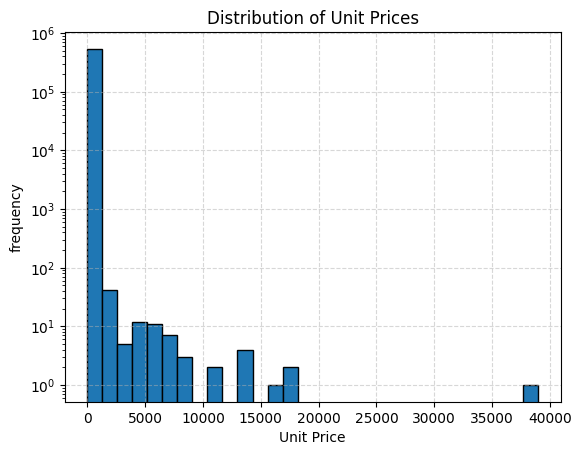

In [ ]:
# Histogram to visualize distribution of UnitPriceyes
valid_prices = df[df["UnitPrice"] > 0]["UnitPrice"]

plt.hist(valid_prices , bins = 30, edgecolor='Black')
plt.grid(True, linestyle='--', alpha=0.5)
plt.yscale('log')
plt.title('Distribution of Unit Prices')
plt.xlabel('Unit Price')
plt.ylabel('frequency')
plt.show()

### Scatter Plot

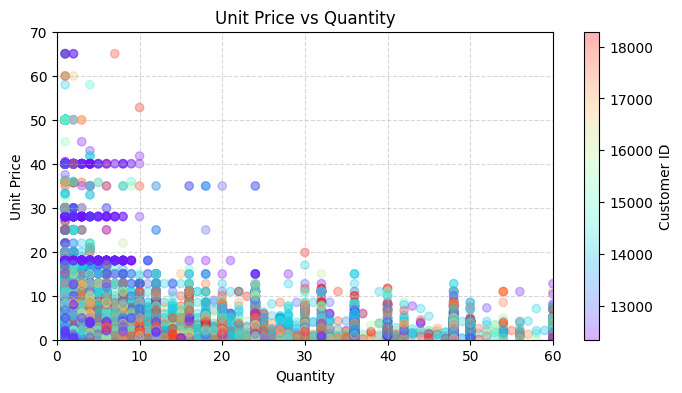

In [108]:
plt.figure(figsize=(8,4))
plt.scatter(df["Quantity"], df["UnitPrice"], alpha=0.3, c=df["CustomerID"], cmap="rainbow")
plt.grid(True, linestyle='--', alpha=0.5)
plt.title("Unit Price vs Quantity")
plt.xlabel("Quantity")
plt.ylabel("Unit Price")
plt.colorbar(label="Customer ID")
plt.ylim(0, 70)
plt.xlim(0, 60)
plt.show()


In [56]:
df["UnitPrice"].describe()


count    535187.000000
mean          4.645242
std          97.364810
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64